# Undersampling & Oversampling

Undersampling aims to decrease the number of instances from the overrepresented class in a data set, they are said to be unbalanced. Unbalanced refers to highly unequal or uneven distribution of classes. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from imblearn.over_sampling import SMOTE #Using nearest neighbors algorithm to generate new and synthetic data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing random forest module

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from preprocessing_ml import *

Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module


In [2]:
###Importing the data
dataframe = pd.read_csv("framingham.csv")

In [3]:
###Seeing the difference between CHD after 10 years and no-CHD.

CHD_count = dataframe.TenYearCHD.value_counts() #Shows the count of no-CHD and CHD after 10 y
print('The CHD after ten years has a ratio of approximately {} to 1.'.format(int(CHD_count[0] / CHD_count[1])))

The CHD after ten years has a ratio of approximately 5 to 1.


In [4]:
def preprocessing(dataframe):
    X_train, X_test, y_train, y_test = split_data(scale_data(drop_missing(chose_features(dataframe))))
    return X_train, X_test, y_train, y_test    

In [5]:
def scores(name, y_test, pred, v):
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    if v == 'y':
        print("The accuracy score for {} is: {}%.".format(name, round(accuracy, 3) * 100))
        print("The f1 score for {} is: {}%.".format(name, round(f1, 3) * 100))
        print("The precision score for {} is: {}%.".format(name, round(precision, 3) * 100))
        print("The recall score for {} is: {}%.".format(name, round(recall, 3) * 100))        
        return(accuracy, f1, precision, recall)
    elif v == 'n':
        return(accuracy, f1, precision, recall)
    else:
        print("Error: please choose 'y' or 'n'.")

In [6]:
def confusion(dataframe, name):
    sns.heatmap(pd.DataFrame(dataframe), annot=True , fmt='g')
    plt.title('Confusion matrix {}\n'.format(name), y=1.1)

In [7]:
def model(classifier, name, X_train, X_test, y_train, y_test, v):
    classifier.fit(X_train, y_train)
    classifier_pred = classifier.predict(X_test)
    score = scores(name, y_test, classifier_pred, v)

    accuracy = score[0]
    f1 = score[1]
    precision = score[2]
    recall = score[3]
    
    confusion(confusion_matrix(y_test, classifier_pred), name)

    return(accuracy, f1, precision, recall)

In [18]:
def oversample(dataframe):
    dataframe_n = preprocessing(dataframe)
    X_train = dataframe_n[0]
    X_test = dataframe_n[1]
    y_train = dataframe_n[2]
    y_test = dataframe_n[3]
    sm = SMOTE(random_state = 0, ratio = 1.0)
    X_train, y_train = sm.fit_sample(X_train, y_train)
    model(RandomForestClassifier(n_estimators=1000, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

In [11]:
def no_resample(dataframe):
    dataframe_n = preprocessing(dataframe)
    X_train = dataframe_n[0]
    X_test = dataframe_n[1]
    y_train = dataframe_n[2]
    y_test = dataframe_n[3]
    model(RandomForestClassifier(n_estimators=1000, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');

The accuracy score for Random Forest is: 83.1%.
The f1 score for Random Forest is: 10.100000000000001%.
The precision score for Random Forest is: 46.7%.
The recall score for Random Forest is: 5.7%.


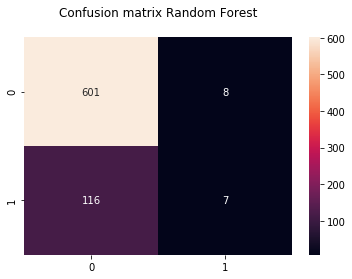

In [12]:
no_resample(dataframe)

The accuracy score for Random Forest is: 80.2%.
The f1 score for Random Forest is: 31.3%.
The precision score for Random Forest is: 37.5%.
The recall score for Random Forest is: 26.8%.


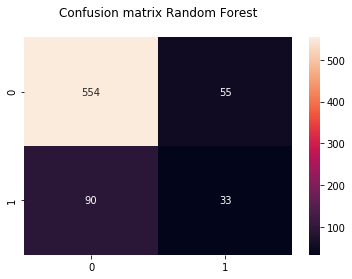

In [19]:
oversample(dataframe)

In [ ]:
model(RandomForestClassifier(n_estimators=100, bootstrap=True), 'Random Forest', X_train_oversampled, X_test, y_train_oversampled, y_test, 'y');

The accuracy score for Random Forest is: 65.0%.
The f1 score for Random Forest is: 64.5%.
The precision score for Random Forest is: 58.699999999999996%.
The recall score for Random Forest is: 71.7%.


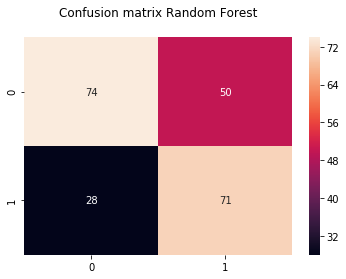

In [20]:
dataframe = dataframe.sample(frac=1,random_state=1)

CHD_data = dataframe.loc[dataframe['TenYearCHD'] == 1]
non_CHD_data = dataframe.loc[dataframe['TenYearCHD'] == 0].sample(n=CHD_count[1], random_state = 1)

dataframe = pd.concat([CHD_data, non_CHD_data])
dataframe = dataframe.sample(frac=1,random_state=1)

df = preprocessing(dataframe)
X_train = df[0]
X_test = df[1]
y_train = df[2]
y_test = df[3]
model(RandomForestClassifier(n_estimators=1000, bootstrap=True), 'Random Forest', X_train, X_test, y_train, y_test, 'y');